# Introduction to Convolutional Neural Network

In this notebook, we will define and train a convolutional neural network using Keras framework.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import clear_output
import random
from keras.datasets import cifar10
import pandas as pd

seed = 42
np.random.seed(seed)

2023-11-24 13:20:28.052963: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 13:20:28.055042: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 13:20:28.084192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 13:20:28.084217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 13:20:28.085060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## 1. Load CIFAR10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('=======================================================================')
print('CIFAR10 Dataset Split:')
print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One hot encoding of class labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('=======================================================================')
print('After One Hot Encoding:')
print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
print('=======================================================================')

CIFAR10 Dataset Split:
x train shape =  (50000, 32, 32, 3)
y train shape =  (50000, 1)
x test shape =  (10000, 32, 32, 3)
y test shape =  (10000, 1)
After One Hot Encoding:
x train shape =  (50000, 32, 32, 3)
y train shape =  (50000, 10)
x test shape =  (10000, 32, 32, 3)
y test shape =  (10000, 10)


## 2. Visualize CIFAR10 data

CIFAR10:


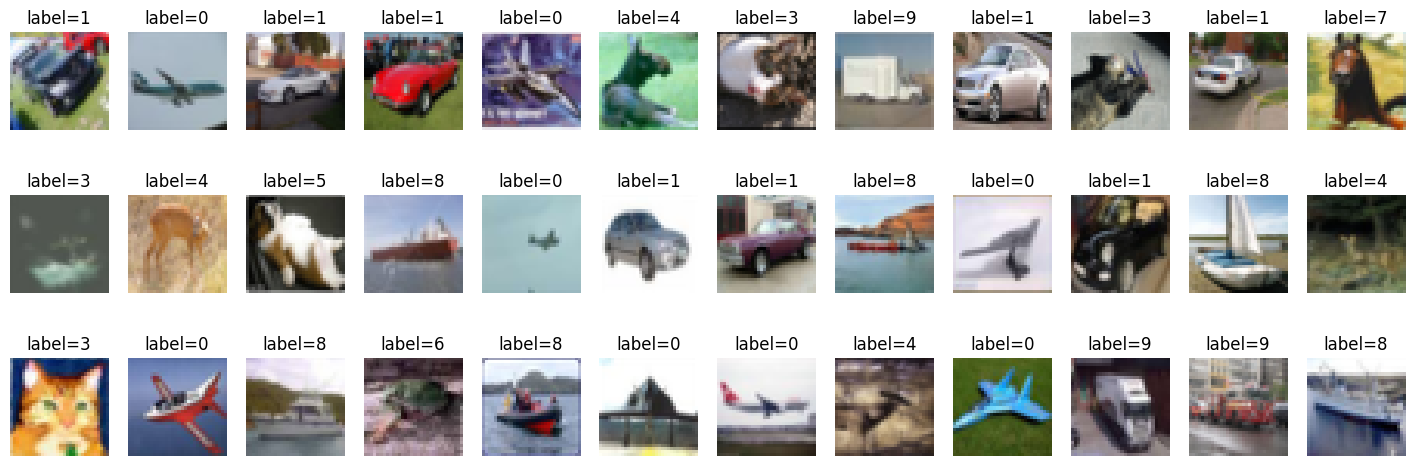

In [3]:
#Function to plot loss and accuracy curves
def plot_curve(log):
    N_train = len(log.history['loss'])
    N_valid = len(log.history['val_loss'])
    
    plt.figure(figsize=(18,4))
    
    # Plot loss on training and validation set
    plt.subplot(1,2,1)
    plt.plot(log.history['loss'])
    plt.plot(np.linspace(0,N_train-1,N_valid), log.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid('on')
    plt.legend(['Train', 'Validation'])
    
    # Plot accuracy on training and validation set
    plt.subplot(1,2,2)
    plt.plot(log.history['accuracy'])
    plt.plot(np.linspace(0,N_train-1,N_valid), log.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.grid('on')
    plt.legend(['Train', 'Validation'])
    
    plt.show()

#Visualize CIFAR-10 dataset     
def imgrid(x,y,yp,xx,yy):
    ind = [i for i in range(x.shape[0])]
    random.shuffle(ind)

    plt.figure(figsize=(18,yy*2))
    for i in range(xx*yy):
        plt.subplot(yy,xx,i+1)
        if x.shape[3]==1:
            plt.imshow(x[ind[i],:,:,0],cmap='gray')
        else:
            plt.imshow(x[ind[i],:,:,:])

        if len(yp)>0:
            plt.title('p=%d, gt=%d'%(yp[ind[i]],y[ind[i]]))
        else:
            plt.title('label=%d'%(y[ind[i]]))
        plt.axis('off')
    plt.show()

print('CIFAR10:')
print('===================================================================================================================')
imgrid(x_train,np.argmax(y_train,1),[],12,3)
print('===================================================================================================================')

## 3. Model Definition

In [4]:
model = keras.Sequential(name="SimpleCNN")
model.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape = x_train.shape[1:], name="Layer-1"))
model.add(layers.MaxPool2D((2,2),name="Layer-2"))
model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', name="Layer-3"))
model.add(layers.MaxPool2D((2,2), name="Layer-4"))
model.add(layers.Flatten(name="Layer-5"))
model.add(layers.Dense(512, activation='relu', name="Layer-6"))
model.add(layers.Dense(10, activation='softmax', name="Layer-7"))

model.summary()

Model: "SimpleCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer-1 (Conv2D)            (None, 32, 32, 32)        896       
                                                                 
 Layer-2 (MaxPooling2D)      (None, 16, 16, 32)        0         
                                                                 
 Layer-3 (Conv2D)            (None, 16, 16, 64)        18496     
                                                                 
 Layer-4 (MaxPooling2D)      (None, 8, 8, 64)          0         
                                                                 
 Layer-5 (Flatten)           (None, 4096)              0         
                                                                 
 Layer-6 (Dense)             (None, 512)               2097664   
                                                                 
 Layer-7 (Dense)             (None, 10)                51

2023-11-24 13:20:31.311031: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 4. Model Training

Epoch 1/20
313/313 [==============================] - 8s 23ms/step - loss: 1.4751 - accuracy: 0.4733
Epoch 2/20
313/313 [==============================] - 7s 24ms/step - loss: 1.0740 - accuracy: 0.6247
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 0.9321 - accuracy: 0.6759
Epoch 4/20
313/313 [==============================] - 8s 25ms/step - loss: 0.8246 - accuracy: 0.7124
Epoch 5/20
313/313 [==============================] - 8s 27ms/step - loss: 0.7351 - accuracy: 0.7442 - val_loss: 0.8918 - val_accuracy: 0.6971
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 0.6523 - accuracy: 0.7731
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.5628 - accuracy: 0.8043
Epoch 8/20
313/313 [==============================] - 7s 24ms/step - loss: 0.4728 - accuracy: 0.8358
Epoch 9/20
313/313 [==============================] - 8s 25ms/step - loss: 0.3792 - accuracy: 0.8719
Epoch 10/20
313/313 [============================

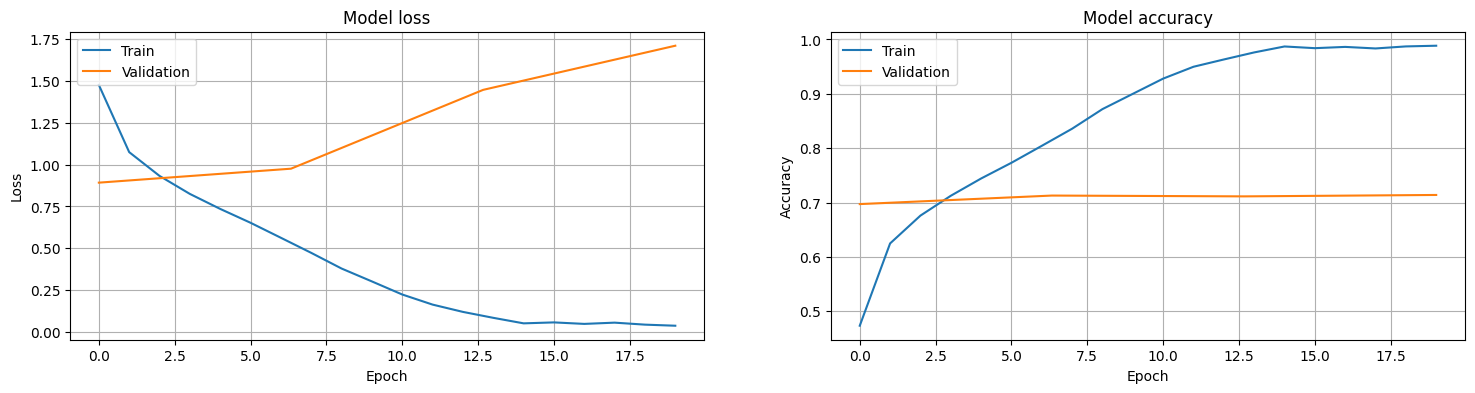

In [5]:
opt = keras.optimizers.Adam(lr=0.001)
#Configure the model for training
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

"""
Increase the Batch Size for faster training. Eg: Set the value to 256
"""

log = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, validation_freq=5,verbose=True);

#Plot Loss and Accuracy curves
plot_curve(log)

## 5. Evaluation

In [6]:
#Displaying the test performance
score = model.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score[0])
print("Test accuracy: ", 100*score[1])
print('=======================================================================')

Test loss:      1.7572596073150635
Test accuracy:  70.69000005722046


## Solving Overfitting Problem


## 1. Adding Dropout

In [7]:
model1 = keras.Sequential(name="SimpleCNN_with_Dropout")
model1.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape = x_train.shape[1:], name="Layer-1"))
model1.add(layers.MaxPool2D((2,2),name="Layer-2"))
model1.add(layers.Dropout(0.25, name='Layer-3'))
model1.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', name="Layer-4"))
model1.add(layers.MaxPool2D((2,2), name="Layer-5"))
model1.add(layers.Dropout(0.25, name='Layer-6'))
model1.add(layers.Flatten(name="Layer-7"))
model1.add(layers.Dense(512, activation='relu', name="Layer-8"))
model1.add(layers.Dropout(0.5, name='Layer-9'))
model1.add(layers.Dense(10, activation='softmax', name="Output_Layer"))
model1.summary()


Model: "SimpleCNN_with_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer-1 (Conv2D)            (None, 32, 32, 32)        896       
                                                                 
 Layer-2 (MaxPooling2D)      (None, 16, 16, 32)        0         
                                                                 
 Layer-3 (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 Layer-4 (Conv2D)            (None, 16, 16, 64)        18496     
                                                                 
 Layer-5 (MaxPooling2D)      (None, 8, 8, 64)          0         
                                                                 
 Layer-6 (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 Layer-7 (Flatten)           (None, 4096)   

Epoch 1/20
313/313 [==============================] - 9s 28ms/step - loss: 1.6377 - accuracy: 0.4047
Epoch 2/20
313/313 [==============================] - 9s 29ms/step - loss: 1.2971 - accuracy: 0.5364
Epoch 3/20
313/313 [==============================] - 8s 27ms/step - loss: 1.1395 - accuracy: 0.5965
Epoch 4/20
313/313 [==============================] - 8s 26ms/step - loss: 1.0407 - accuracy: 0.6335
Epoch 5/20
313/313 [==============================] - 9s 29ms/step - loss: 0.9747 - accuracy: 0.6564 - val_loss: 0.9006 - val_accuracy: 0.6935
Epoch 6/20
313/313 [==============================] - 9s 28ms/step - loss: 0.9171 - accuracy: 0.6784
Epoch 7/20
313/313 [==============================] - 9s 28ms/step - loss: 0.8708 - accuracy: 0.6945
Epoch 8/20
313/313 [==============================] - 9s 27ms/step - loss: 0.8360 - accuracy: 0.7040
Epoch 9/20
313/313 [==============================] - 9s 28ms/step - loss: 0.8015 - accuracy: 0.7172
Epoch 10/20
313/313 [============================

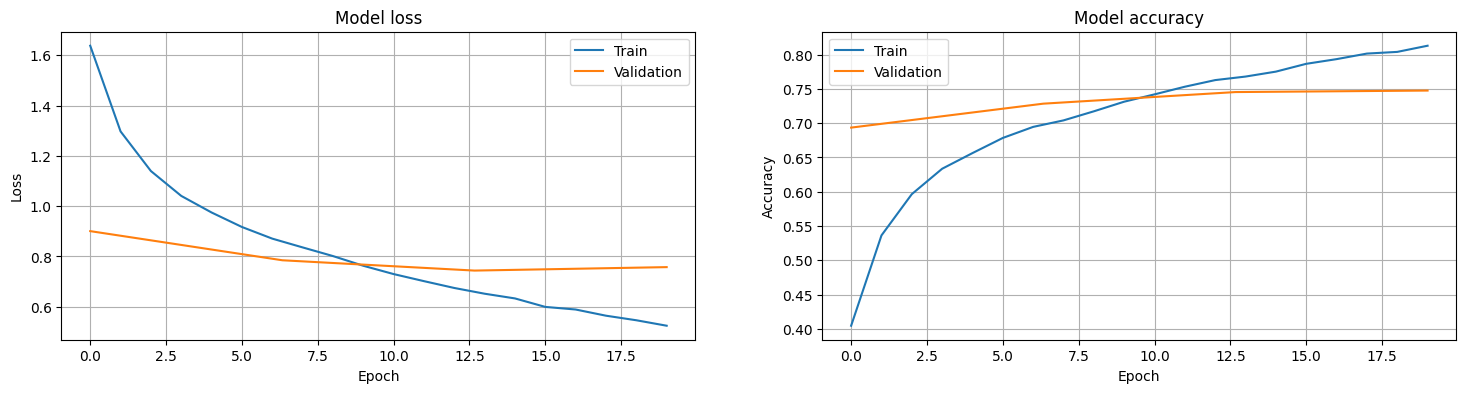

Test loss:      0.7774335741996765
Test accuracy:  73.90000224113464


In [8]:
#Configure the model for training
model1.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

"""
Increase the Batch Size for faster training. Eg: Set the value to 256
"""

log1 = model1.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, validation_freq=5, verbose=True);

#Plot Loss and Accuracy curves
plot_curve(log1)

#Displaying the test performance
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score1[0])
print("Test accuracy: ", 100*score1[1])
print('=======================================================================')

## 2. More Layers and Kernels

In [9]:
model2 = keras.Sequential(name="Deeper_CNN")
model2.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', input_shape = x_train.shape[1:], name="Layer-1"))
model2.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', name="Layer-2"))
model2.add(layers.MaxPool2D((2,2),name="Layer-3"))
model2.add(layers.Dropout(0.25, name='Layer-4'))
model2.add(layers.Conv2D(128, (3,3), padding="same", activation='relu', name="Layer-5"))
model2.add(layers.Conv2D(128, (3,3), padding="same", activation='relu', name="Layer-6"))
model2.add(layers.MaxPool2D((2,2), name="Layer-7"))
model2.add(layers.Dropout(0.25, name='Layer-8'))
model2.add(layers.Flatten(name="Layer-9"))
model2.add(layers.Dense(512, activation='relu', name="Layer-10"))
model2.add(layers.Dropout(0.5, name='Layer-11'))
model2.add(layers.Dense(10, activation='softmax', name="Output_Layer"))
model2.summary()

Model: "Deeper_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer-1 (Conv2D)            (None, 32, 32, 64)        1792      
                                                                 
 Layer-2 (Conv2D)            (None, 32, 32, 64)        36928     
                                                                 
 Layer-3 (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 Layer-4 (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 Layer-5 (Conv2D)            (None, 16, 16, 128)       73856     
                                                                 
 Layer-6 (Conv2D)            (None, 16, 16, 128)       147584    
                                                                 
 Layer-7 (MaxPooling2D)      (None, 8, 8, 128)         0

Epoch 1/20
313/313 [==============================] - 48s 151ms/step - loss: 1.6557 - accuracy: 0.3945
Epoch 2/20
313/313 [==============================] - 49s 156ms/step - loss: 1.1745 - accuracy: 0.5820
Epoch 3/20
313/313 [==============================] - 47s 152ms/step - loss: 0.9734 - accuracy: 0.6582
Epoch 4/20
313/313 [==============================] - 46s 147ms/step - loss: 0.8468 - accuracy: 0.7014
Epoch 5/20
313/313 [==============================] - 49s 157ms/step - loss: 0.7492 - accuracy: 0.7382 - val_loss: 0.7489 - val_accuracy: 0.7350
Epoch 6/20
313/313 [==============================] - 46s 145ms/step - loss: 0.6782 - accuracy: 0.7626
Epoch 7/20
313/313 [==============================] - 46s 146ms/step - loss: 0.6188 - accuracy: 0.7826
Epoch 8/20
313/313 [==============================] - 48s 152ms/step - loss: 0.5648 - accuracy: 0.8006
Epoch 9/20
313/313 [==============================] - 45s 145ms/step - loss: 0.5240 - accuracy: 0.8131
Epoch 10/20
313/313 [==========

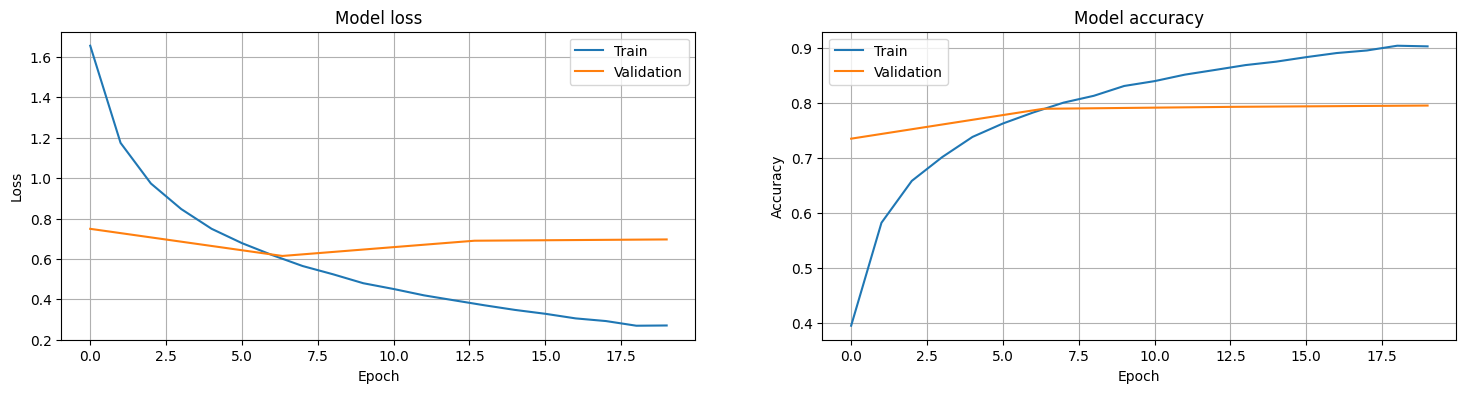

Test loss:      0.7226060628890991
Test accuracy:  79.03000116348267


In [10]:
#Configure the model for training
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

"""
Increase the Batch Size for faster training. Eg: Set the value to 256
"""

log2 = model2.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, validation_freq=5, verbose=True);

#Plot Loss and Accuracy curves
plot_curve(log2)

#Displaying the test performance
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score2[0])
print("Test accuracy: ", 100*score2[1])
print('=======================================================================')

## 3. Batch Normalization

In [11]:
model3 = keras.Sequential(name="CNN_with_BatchNorm")
model3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape = x_train.shape[1:],name="Layer-1"))
model3.add(layers.BatchNormalization(name="Layer-2"))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-3"))
model3.add(layers.BatchNormalization(name="Layer-4"))
model3.add(layers.MaxPool2D((2, 2),name="Layer-5"))
model3.add(layers.Dropout(0.3,name="Layer-6"))
model3.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-7"))
model3.add(layers.BatchNormalization(name="Layer-8"))
model3.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-9"))
model3.add(layers.BatchNormalization(name="Layer-10"))
model3.add(layers.MaxPool2D((2, 2),name="Layer-11"))
model3.add(layers.Dropout(0.4,name="Layer-12"))
model3.add(layers.Flatten(name="Layer-13"))
model3.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform',name="Layer-14"))
model3.add(layers.BatchNormalization(name="Layer-15"))
model3.add(layers.Dropout(0.5,name="Layer-16"))
model3.add(layers.Dense(10, activation='softmax',name='Output_Layer'))

model3.summary()

Model: "CNN_with_BatchNorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer-1 (Conv2D)            (None, 32, 32, 64)        1792      
                                                                 
 Layer-2 (BatchNormalizatio  (None, 32, 32, 64)        256       
 n)                                                              
                                                                 
 Layer-3 (Conv2D)            (None, 32, 32, 64)        36928     
                                                                 
 Layer-4 (BatchNormalizatio  (None, 32, 32, 64)        256       
 n)                                                              
                                                                 
 Layer-5 (MaxPooling2D)      (None, 16, 16, 64)        0         
                                                                 
 Layer-6 (Dropout)           (None, 16, 16, 64) 

Epoch 1/30
313/313 [==============================] - 51s 158ms/step - loss: 1.5859 - accuracy: 0.4699
Epoch 2/30
313/313 [==============================] - 51s 162ms/step - loss: 1.0479 - accuracy: 0.6308
Epoch 3/30
313/313 [==============================] - 50s 158ms/step - loss: 0.8805 - accuracy: 0.6895
Epoch 4/30
313/313 [==============================] - 50s 160ms/step - loss: 0.7893 - accuracy: 0.7250
Epoch 5/30
313/313 [==============================] - 55s 175ms/step - loss: 0.7010 - accuracy: 0.7534 - val_loss: 0.7379 - val_accuracy: 0.7402
Epoch 6/30
313/313 [==============================] - 49s 156ms/step - loss: 0.6412 - accuracy: 0.7766
Epoch 7/30
313/313 [==============================] - 51s 164ms/step - loss: 0.5817 - accuracy: 0.7969
Epoch 8/30
313/313 [==============================] - 51s 162ms/step - loss: 0.5333 - accuracy: 0.8137
Epoch 9/30
313/313 [==============================] - 50s 160ms/step - loss: 0.4824 - accuracy: 0.8326
Epoch 10/30
313/313 [==========

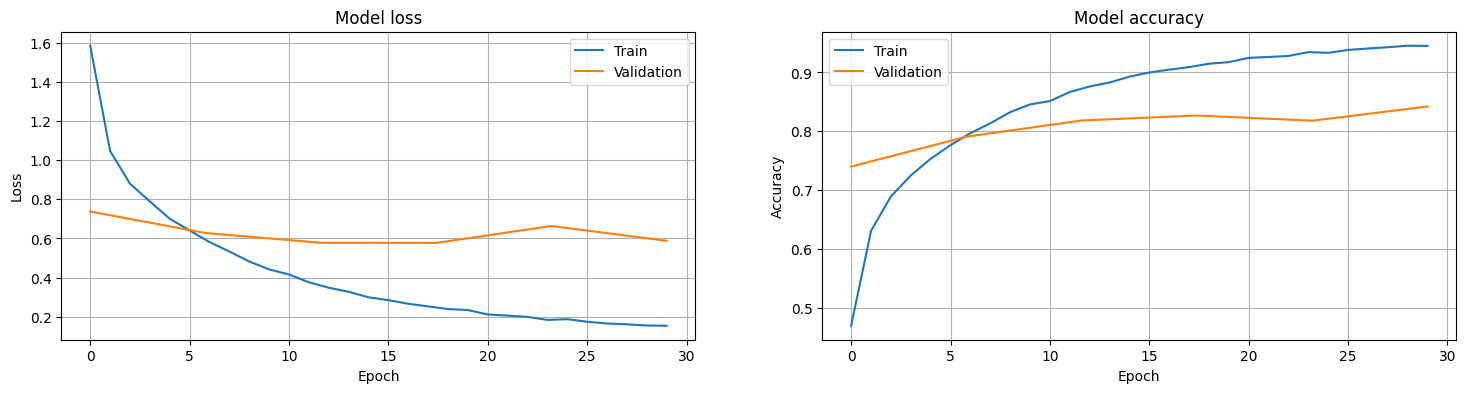

Test loss:      0.59101402759552
Test accuracy:  83.19000005722046


In [12]:
#Configure the model for training
model3.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

"""
Increase the Batch Size for faster training. Eg: Set the value to 256
"""

log3 = model3.fit(x_train, y_train, batch_size=128, epochs=30,
          validation_split=0.2, validation_freq=5, verbose=True);

#Plot Loss and Accuracy curves
plot_curve(log3)

#Displaying the test performance
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score3[0])
print("Test accuracy: ", 100*score3[1])
print('=======================================================================')

## 4. Data Augmentation

In [15]:
model4 = keras.Sequential(name="CNN_with_Data_Aug")
model4.add(layers.InputLayer(x_train.shape[1:]))
model4.add(layers.RandomRotation(factor=0.05,name='Aug-1'))
model4.add(layers.RandomTranslation(0.1,0.1,name='Aug-2'))
model4.add(layers.RandomFlip(mode='horizontal',name='Aug-3'))
model4.add(layers.RandomContrast(factor=0.2,name='Aug-4'))
model4.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape = x_train.shape[1:],name="Layer-1"))
model4.add(layers.BatchNormalization(name="Layer-2"))
model4.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-3"))
model4.add(layers.BatchNormalization(name="Layer-4"))
model4.add(layers.MaxPool2D((2, 2),name="Layer-5"))
model4.add(layers.Dropout(0.3,name="Layer-6"))
model4.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-7"))
model4.add(layers.BatchNormalization(name="Layer-8"))
model4.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',name="Layer-9"))
model4.add(layers.BatchNormalization(name="Layer-10"))
model4.add(layers.MaxPool2D((2, 2),name="Layer-11"))
model4.add(layers.Dropout(0.4,name="Layer-12"))
model4.add(layers.Flatten(name="Layer-13"))
model4.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform',name="Layer-14"))
model4.add(layers.BatchNormalization(name="Layer-15"))
model4.add(layers.Dropout(0.5,name="Layer-16"))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()

Model: "CNN_with_Data_Aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Aug-1 (RandomRotation)      (None, 32, 32, 3)         0         
                                                                 
 Aug-2 (RandomTranslation)   (None, 32, 32, 3)         0         
                                                                 
 Aug-3 (RandomFlip)          (None, 32, 32, 3)         0         
                                                                 
 Aug-4 (RandomContrast)      (None, 32, 32, 3)         0         
                                                                 
 Layer-1 (Conv2D)            (None, 32, 32, 64)        1792      
                                                                 
 Layer-2 (BatchNormalizatio  (None, 32, 32, 64)        256       
 n)                                                              
                                                 

Epoch 1/50
313/313 [==============================] - 53s 163ms/step - loss: 1.7850 - accuracy: 0.4044
Epoch 2/50
313/313 [==============================] - 52s 167ms/step - loss: 1.2998 - accuracy: 0.5397
Epoch 3/50
313/313 [==============================] - 53s 169ms/step - loss: 1.1164 - accuracy: 0.6065
Epoch 4/50
313/313 [==============================] - 53s 170ms/step - loss: 1.0241 - accuracy: 0.6366
Epoch 5/50
313/313 [==============================] - 57s 181ms/step - loss: 0.9599 - accuracy: 0.6624 - val_loss: 0.9592 - val_accuracy: 0.6825
Epoch 6/50
313/313 [==============================] - 52s 168ms/step - loss: 0.9047 - accuracy: 0.6818
Epoch 7/50
313/313 [==============================] - 52s 167ms/step - loss: 0.8629 - accuracy: 0.6978
Epoch 8/50
313/313 [==============================] - 52s 167ms/step - loss: 0.8218 - accuracy: 0.7120
Epoch 9/50
313/313 [==============================] - 52s 166ms/step - loss: 0.7902 - accuracy: 0.7270
Epoch 10/50
313/313 [==========

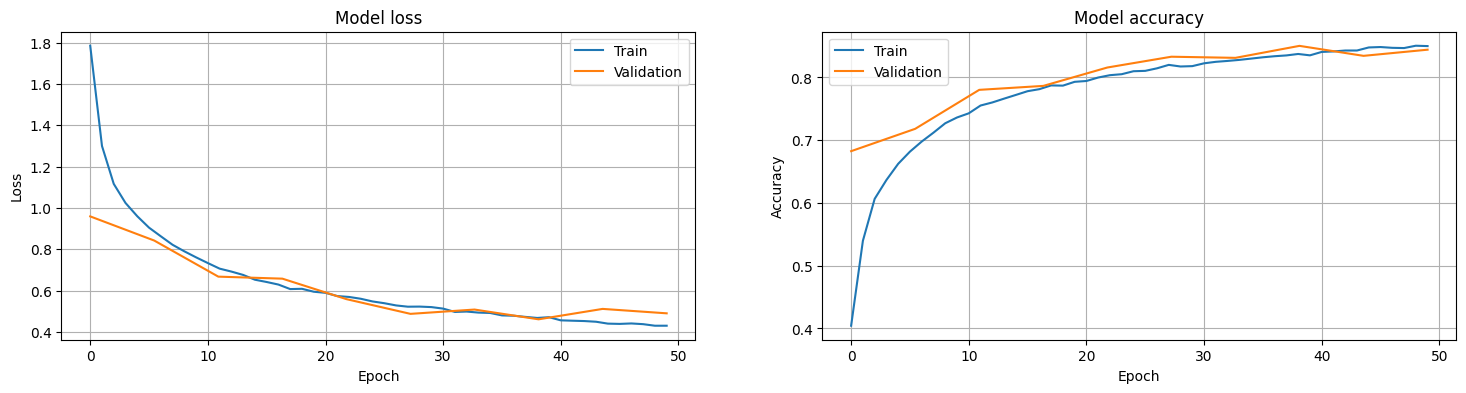

Test loss:      0.5224398374557495
Test accuracy:  83.48000049591064


In [16]:
#Configure the model for training
model4.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

"""
Increase the Batch Size for faster training. Eg: Set the value to 256
"""

log4 = model4.fit(x_train, y_train, batch_size=128, epochs=50,
          validation_split=0.2, validation_freq=5, verbose=True);

#Plot Loss and Accuracy curves
plot_curve(log4)

#Displaying the test performance
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('=======================================================================')
print("Test loss:     ", score4[0])
print("Test accuracy: ", 100*score4[1])
print('=======================================================================')

In [19]:
results = {"Accuracy":[100*score[1],100*score1[1],100*score2[1],100*score3[1],100*score4[1]],
          "Loss":[score[0],score1[0],score2[0],score3[0],score4[0]]}

df = pd.DataFrame(results, index = ["SimpleCNN", "SimpleCNN with Dropout", "Deeper CNN", "CNN with BatchNorm", "CNN with Data Aug"])
print(df)

                         Accuracy      Loss
SimpleCNN               70.690000  1.757260
SimpleCNN with Dropout  73.900002  0.777434
Deeper CNN              79.030001  0.722606
CNN with BatchNorm      83.190000  0.591014
CNN with Data Aug       83.480000  0.522440


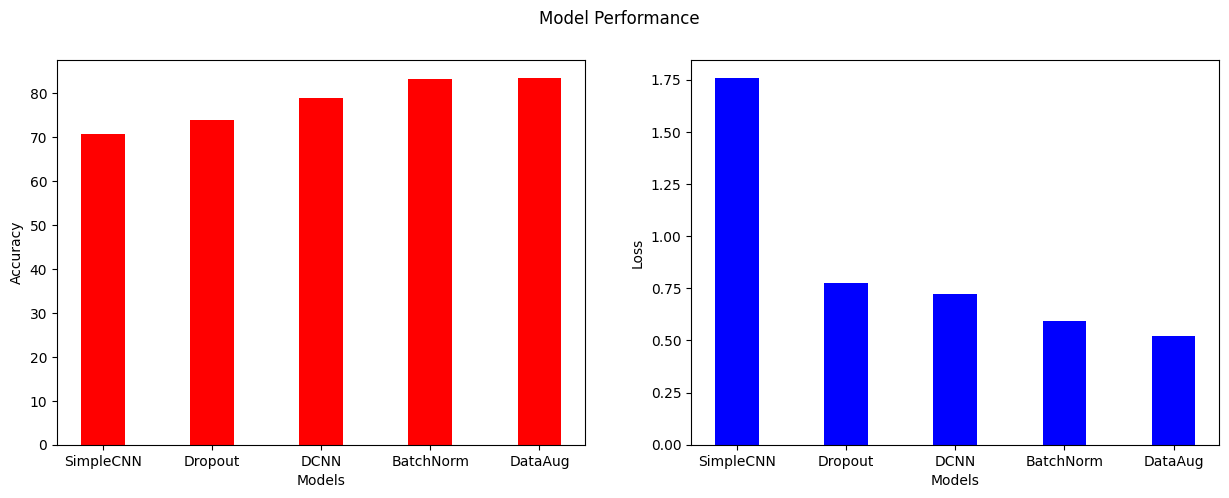

In [20]:
models = ["SimpleCNN", "Dropout", "DCNN", "BatchNorm", "DataAug"]
acc = results["Accuracy"]
loss = results["Loss"]

fig = plt.figure(figsize =(15, 5))
plt.subplot(1, 2, 1)
# creating the bar plot
plt.bar(models, acc, color ='red', 
        width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
# creating the bar plot
plt.bar(models, loss, color ='blue', 
        width = 0.4)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.suptitle("Model Performance")
plt.show()